<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Приведение-данных-к-нужному-типу" data-toc-modified-id="Приведение-данных-к-нужному-типу-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Приведение данных к нужному типу</a></span></li><li><span><a href="#Подготовка-пользовательских-данных" data-toc-modified-id="Подготовка-пользовательских-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подготовка пользовательских данных</a></span></li><li><span><a href="#Обработка-нулевых-значений-в-таблицах-calls-и-internet" data-toc-modified-id="Обработка-нулевых-значений-в-таблицах-calls-и-internet-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка нулевых значений в таблицах calls и internet</a></span></li><li><span><a href="#Помесячная-выручка-с-каждого-пользователя" data-toc-modified-id="Помесячная-выручка-с-каждого-пользователя-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Помесячная выручка с каждого пользователя</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотезы" data-toc-modified-id="Проверка-гипотезы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотезы</a></span><ul class="toc-item"><li><span><a href="#1-гипотеза" data-toc-modified-id="1-гипотеза-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>1 гипотеза</a></span></li><li><span><a href="#2-гипотеза" data-toc-modified-id="2-гипотеза-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>2 гипотеза</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком компании

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нужно сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание данных**

*Таблица users (информация о пользователях):*

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

*Таблица calls (информация о звонках):*

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

*Таблица messages (информация о сообщениях):*

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

*Таблица internet (информация об интернет-сессиях):*

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

*Таблица tariffs (информация о тарифах):*

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Изучение данных из файла

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
pd.options.display.max_columns = None
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

In [3]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
users['user_id'].value_counts()

1024    1
1353    1
1366    1
1365    1
1364    1
       ..
1185    1
1184    1
1183    1
1182    1
1023    1
Name: user_id, Length: 500, dtype: int64

In [5]:
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [6]:
calls['user_id'].value_counts()

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

In [7]:
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [8]:
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [9]:
messages['user_id'].value_counts()

1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1111       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64

In [10]:
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [11]:
internet['user_id'].value_counts()

1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype: int64

In [12]:
tariffs.info()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Все данные с таблицах оказались достаточно чистыми, что требует минимум их предобработки.
Нужно изменить только 2 параметра:

    1) Во всех столбцах с датой нужно поменять тип данных на date;
    2) В таблице internet удалить столбец Unnamed: 0.


## Подготовка данных

### Приведение данных к нужному типу

In [13]:
users['reg_date']=pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
calls['call_date']=pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date']=pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date']=pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
#изменили тип данных object на дату и время. 

In [14]:
del internet['Unnamed: 0']
#удаляем лишний столбец

In [15]:
internet.head()
#проверили, что лишний столбец удалился

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


### Подготовка пользовательских данных

In [16]:
calls['month']=pd.DatetimeIndex(calls['call_date']).month
messages['month']=pd.DatetimeIndex(messages['message_date']).month
internet['month']=pd.DatetimeIndex(internet['session_date']).month
#в каждую таблицу добавили столбец с месяцем

### Обработка нулевых значений в таблицах calls и internet

In [17]:
calls.query('duration==0').count()

id           39613
call_date    39613
duration     39613
user_id      39613
month        39613
dtype: int64

Нулями обозначены пропущенные звонки, удалить эти значения или заменить их например на 1 мы не можем, так как это может исказить наш вывод по тарифам.

In [18]:
internet.query('mb_used==0').count()

id              19598
mb_used         19598
session_date    19598
user_id         19598
month           19598
dtype: int64

Нулевые значения объема интернет-трафика могли появиться из-за того, что пользователь не пользовался интернетом, следовательно не тратил мб. Заменять или удалять эти значения неккоректно. На наше исследование нулевые значения не должны никак повлиять.

In [19]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


Исходя из примечания к тарифам "«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута."

Нужно каждый совершенный звонок округлить в большую сторону.

In [20]:
from math import ceil   
#импортировали из библиотеки math функцию ceil
calls['duration']=calls['duration'].apply(ceil) 
#округлили продолжительность звоноков до целого в большую сторону
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [21]:
calls_group=calls.groupby(['user_id', 'month'])[['duration']].agg(['count', 'sum']).reset_index()
messages_group = messages.groupby(['user_id', 'month'])['message_date'].count().reset_index()
internet_group=internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

Создали таблицы с количеством и продолжительность звонков, с количеством сообщений и объемом израсходованного трафика

In [22]:
calls_group

user_id month duration     
                      count  sum
0       1000     5       22  159
1       1000     6       43  172
2       1000     7       47  340
3       1000     8       52  408
4       1000     9       58  466
...      ...   ...      ...  ...
3169    1498    10       41  247
3170    1499     9        9   70
3171    1499    10       68  449
3172    1499    11       74  612
3173    1499    12       69  492

[3174 rows x 4 columns]

In [23]:
calls_group.columns=['user_id', 'month', 'calls', 'duration'] 
#меняю названия столбцов

In [24]:
messages_group

,user_id,month,message_date
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [25]:
messages_group.columns=['user_id', 'month', 'message'] 
#меняю названия столбцов

In [26]:
internet_group

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


Нужно округлить объём потраченного за сессию интернет-трафика (в мегабайтах) в большую сторону, так как 

"Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта."

In [27]:
internet_group['mb_used']=internet_group['mb_used'].apply(ceil)
#округлили объем израсходованного интернет-трафика до целого в большую сторону
internet_group.head()

,user_id,month,mb_used
0,1000,5,2254
1,1000,6,23234
2,1000,7,14004
3,1000,8,14056
4,1000,9,14569


In [28]:
tariffs.rename(columns = {'tariff_name':'tariff'}, inplace = True) 
#меняю название столбца для того, чтобы потом объединить все данные в одну таблицу

Объединили все таблицы в одну методом merge.

In [29]:
all_group = (calls_group
               .merge(messages_group, on=('user_id', 'month'), how='left')
               .merge(internet_group, on=('user_id', 'month'), how='outer')
               .merge(users, on=('user_id'))
               .merge(tariffs, on=('tariff')))

In [30]:
all_group

,user_id,month,calls,duration,message,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,2254.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,23234.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,14004.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,81.0,14056.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,57.0,14569.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,NaN,11051.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3210,1489,9,NaN,NaN,NaN,17207.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3211,1489,10,NaN,NaN,NaN,19560.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,11,NaN,NaN,NaN,17492.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3


In [31]:
all_group.isnull().sum()

user_id                     0
month                       0
calls                      40
duration                   40
message                   536
mb_used                    11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

### Помесячная выручка с каждого пользователя

In [32]:
all_group['minutes']=all_group['duration']-all_group['minutes_included']
all_group['mb']=all_group['mb_used']-all_group['mb_per_month_included']
all_group['ex_message']=all_group['message']-all_group['messages_included']
#посчитали количество неизрасходванного трафика для каждог параметра

Длительность звонков, количество сообщений и объем трафика, который остался неизрасходованным запишем в таблицу как 0. Для этого используем функцию def. Для того, чтобы в дальнейшем посчитать для каждого пользователя сумму, которую он тратит на тариф в месяц.

In [33]:
def unspent(i):
    if i > 0:
        return i
    else:
        return 0

In [34]:
all_group['minutes'] = all_group['minutes'].apply(unspent)
all_group['mb'] = all_group['mb'].apply(unspent)
all_group['ex_message'] = all_group['ex_message'].apply(unspent)

In [35]:
all_group.head()

,user_id,month,calls,duration,message,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes,mb,ex_message
0,1000,5,22.0,159.0,22.0,2254.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
1,1000,6,43.0,172.0,60.0,23234.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
2,1000,7,47.0,340.0,75.0,14004.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
3,1000,8,52.0,408.0,81.0,14056.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
4,1000,9,58.0,466.0,57.0,14569.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0


Переведем мб в гб, чтобы в дальнейшем рассчитать помесячную выручку с каждого пользователя.

In [36]:
all_group['mb']=all_group['mb']/1024
all_group['mb']=all_group['mb'].apply(ceil)
all_group.rename(columns = {'mb':'gb'}, inplace = True) 

Рассчитаем помесячную выручку для каждого пользователя.

In [37]:
all_group['total_fee']=(all_group['rub_monthly_fee']+
    (all_group['minutes']*all_group['rub_per_minute'])+
    (all_group['gb']*all_group['rub_per_gb'])+
    (all_group['ex_message']*all_group['rub_per_message']))

In [38]:
all_group

,user_id,month,calls,duration,message,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes,gb,ex_message,total_fee
0,1000,5,22.0,159.0,22.0,2254.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0,0.0,1950.0
1,1000,6,43.0,172.0,60.0,23234.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0,0.0,1950.0
2,1000,7,47.0,340.0,75.0,14004.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0,0.0,1950.0
3,1000,8,52.0,408.0,81.0,14056.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0,0.0,1950.0
4,1000,9,58.0,466.0,57.0,14569.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,NaN,11051.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0,0,0.0,550.0
3210,1489,9,NaN,NaN,NaN,17207.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0,2,0.0,950.0
3211,1489,10,NaN,NaN,NaN,19560.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0,5,0.0,1550.0
3212,1489,11,NaN,NaN,NaN,17492.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0,3,0.0,1150.0


In [39]:
all_group = all_group.drop(['first_name', 'last_name', 'messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee','rub_per_gb', 'rub_per_message', 'rub_per_minute', 'minutes', 'gb', 'ex_message'], axis=1)

In [40]:
all_group = all_group.fillna(0)

In [41]:
all_group['mb_used']=all_group['mb_used']/1024
all_group['mb_used']=all_group['mb_used'].apply(ceil)
all_group.rename(columns = {'mb_used':'gb'}, inplace = True) 

In [42]:
all_group['total_fee'] = all_group['total_fee'].astype(int)

In [43]:
all_group.head()

,user_id,month,calls,duration,message,gb,age,churn_date,city,reg_date,tariff,total_fee
0,1000,5,22.0,159.0,22.0,3,52,0,Краснодар,2018-05-25,ultra,1950
1,1000,6,43.0,172.0,60.0,23,52,0,Краснодар,2018-05-25,ultra,1950
2,1000,7,47.0,340.0,75.0,14,52,0,Краснодар,2018-05-25,ultra,1950
3,1000,8,52.0,408.0,81.0,14,52,0,Краснодар,2018-05-25,ultra,1950
4,1000,9,58.0,466.0,57.0,15,52,0,Краснодар,2018-05-25,ultra,1950


Удалили ненужные столбцы из таблицы, заменили NaN на 0, перевели мб в гб, и столбец с выручкой заменили на целочисленный.

## Анализ данных

Создали сводную таблицу где указано, среднее, стандартное отклонение и дисперсия для каждого тарифа по 3 параметрам(количество минут, сообщений, объем трафика в гб)

In [44]:
all_group.pivot_table(
    index='tariff',
    values=('duration', 'message', 'gb'),
    aggfunc=('mean', 'std', 'var')
).reset_index()

tariff    duration                                    gb            \
                mean         std            var       mean       std   
0  smart  417.934948  190.313730   36219.315784  16.328847  5.747061   
1  ultra  526.623350  317.606098  100873.633397  19.494416  9.853511   

                message                          
         var       mean        std          var  
0  33.028705  33.306415  28.274381   799.440628  
1  97.091686  47.341117  46.935795  2202.968887

Пользователям тарифа smart в среднем в месяц требуется:
    
    1) Количество минут - 419 минут;
    2) Объем трафика в гб - 16 гб;
    3) Количество сообщений - 38.
Пользователям тарифа ultra в среднем в месяц требуется:

    1) Количество минут - 545 минут;
    2) Объем трафика в гб - 19 гб;
    3) Количество сообщений - 61.

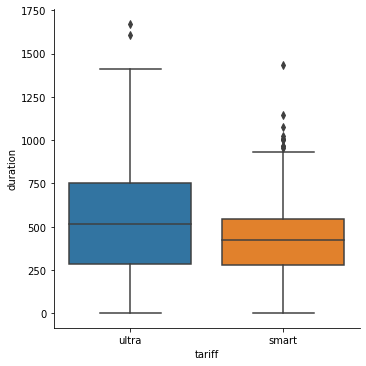

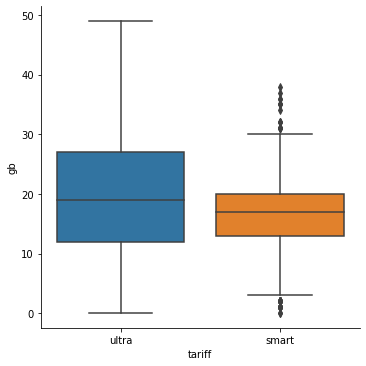

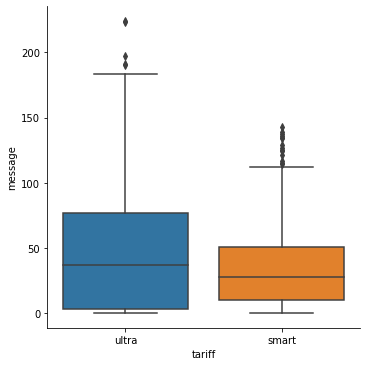

In [45]:
for column in ['duration', 'gb', 'message']:    
    sns.catplot(x="tariff", y=column, kind="box", data=all_group, dodge=False)

По данным графикам можно увидеть, что:
   
       1) Пользователи тарифа ultra тратят большее количество минут на разговоры, гб и сообщений;
       2) Выбросов больше у тарифа smart.

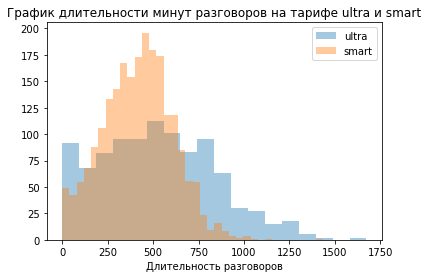

In [46]:
sns.distplot(all_group.query("tariff=='ultra'")['duration'], hist=True, kde=False)
sns.distplot(all_group.query("tariff=='smart'")['duration'], hist=True, kde=False)
plt.title("График длительности минут разговоров на тарифе ultra и smart")
plt.xlabel("Длительность разговоров")
plt.legend(['ultra', 'smart'])

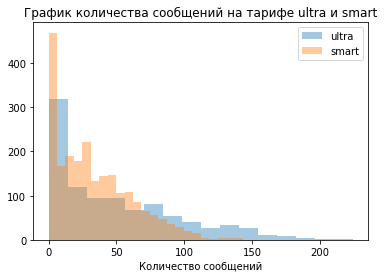

In [47]:
sns.distplot(all_group.query("tariff=='ultra'")['message'], hist=True, kde=False)
sns.distplot(all_group.query("tariff=='smart'")['message'], hist=True, kde=False)
plt.title("График количества сообщений на тарифе ultra и smart")
plt.xlabel("Количество сообщений")
plt.legend(['ultra', 'smart'])

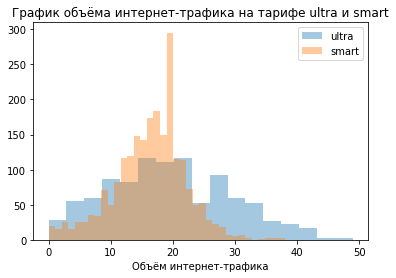

In [48]:
sns.distplot(all_group.query("tariff=='ultra'")['gb'], hist=True, kde=False)
sns.distplot(all_group.query("tariff=='smart'")['gb'], hist=True, kde=False)
plt.title("График объёма интернет-трафика на тарифе ultra и smart")
plt.xlabel("Объём интернет-трафика")
plt.legend(['ultra', 'smart'])

In [49]:
all_group.pivot_table(
    index='tariff',
    values=('duration', 'message', 'gb'),
    aggfunc=('mean', 'std', 'var')
).reset_index()

tariff    duration                                    gb            \
                mean         std            var       mean       std   
0  smart  417.934948  190.313730   36219.315784  16.328847  5.747061   
1  ultra  526.623350  317.606098  100873.633397  19.494416  9.853511   

                message                          
         var       mean        std          var  
0  33.028705  33.306415  28.274381   799.440628  
1  97.091686  47.341117  46.935795  2202.968887

Судя по графикам и по сводной таблице, можно сделать вывод, что дисперсия больше у тарифа ultra(97 258), чем у тарифа smart(35 326), что говорит о том, что разброс данных по этому тарифу выше.

Выброс же больше у тарифа smart, так как людям не хватает в полном объеме тарифного пакета, и им приходится докупать минуты, сообщения и гб.

    Среднее значение по тарифам и 3 параметрам отличается:
    1) Длительность звонков в тарифе smart равно 419 минутам, а в тарифе ultra 545 минут;
    2) Объем трафика в гб в тарифе smart равен 16 гб, а в тарифе ultra 20 гб;
    3) Количество сообщений в тарифе smart равно 38 сообщениям, а в тарифе ultra 61 сообщение.
     
Так как в тарифе ultra в тарифный пакет включено больше минут, сообщений и гб, то скорее всего пользователи стараются использовать их по максимуму, в отличии от пользователей тарифа smart.

## Проверка гипотезы

### 1 гипотеза

Проверка гипотезы, что:

    1) H0 = Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны;
    2) H1 = Средняя выручка пользователей тарифов «Ультра» отличается от тарифа «Смарт».

In [50]:
total_fee_ultra=all_group.query("tariff=='ultra'")['total_fee']
total_fee_smart=all_group.query("tariff=='smart'")['total_fee']

In [51]:
alpha=0.05
results = st.ttest_ind(total_fee_ultra, total_fee_smart)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


Сводная таблица по средней выручке для пользователей тарифов smart и ultra.

In [52]:
all_group.pivot_table(
    index='tariff',
    values='total_fee',
    aggfunc=('mean')
).reset_index()

,tariff,total_fee
0,smart,1289.973531
1,ultra,2070.152284


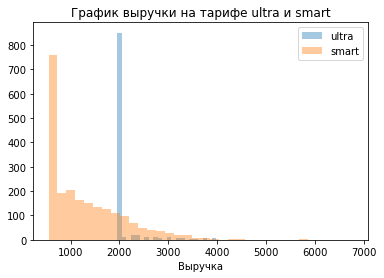

In [53]:
sns.distplot(all_group.query("tariff=='ultra'")['total_fee'], hist=True, kde=False)
sns.distplot(all_group.query("tariff=='smart'")['total_fee'], hist=True, kde=False)
plt.title("График выручки на тарифе ultra и smart")
plt.xlabel("Выручка")
plt.legend(['ultra', 'smart'])

Проверяя гипотезу 1, мы опровергаем, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются в 1.6 раз, что доказывает, что выручка у тарифов сильно различается. В основном пользователи тарифа smart платят по тарифу 550 рублей, но в данном тарифе пользователи чаще выходят за лимит, чем пользователи тарифа smart.

### 2 гипотеза

Проверка гипотезы, что:

    1) H0 = Cредняя выручка пользователей из Москвы равна выручке пользователей из других регионов;
    2) H1 = Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [54]:
moscow=all_group.query("city=='Москва'")['total_fee']
not_moscow=all_group.query("city!='Москва'")['total_fee']

In [55]:
alpha=0.05
results = st.ttest_ind(moscow, not_moscow)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


In [56]:
print('Средняя выручка в Москве', moscow.mean())
print('Средняя выручка в регионах', not_moscow.mean())

Средняя выручка в Москве 1546.7135842880523
Средняя выручка в регионах 1524.9362274298885


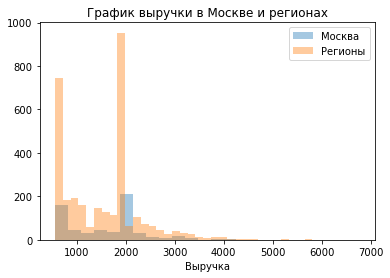

In [57]:
sns.distplot(all_group.query("city=='Москва'")['total_fee'], hist=True, kde=False)
sns.distplot(all_group.query("tariff!='Москва'")['total_fee'], hist=True, kde=False)
plt.title("График выручки в Москве и регионах")
plt.xlabel("Выручка")
plt.legend(['Москва', 'Регионы'])

Мы не смогли отвергнуть гипотезу о том, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

Это наглядно видно по подсчету средней выручки для Москвы она составляет 1546 рублей, а для регионов 1524 рубля.

## Общий вывод

Исходя из запроса компании какой тариф приносит больше денег. По проведенному анализу данных можно сделать вывод, что тариф ultra приносит компании больше денег, а именно средняя выручка для него составляет 2048 рублей, а для тарифа smart 1290 рублей. 

Пользователи тарифа smart чаще оплачивают услуги сверх тарифного пакета, так как им не хватает пакета, который есть у них в тарифе. Эта переплата в среднем составляет 740 рублей, что равно 234.5%.

Некоторые пользователи тарифа ultra также оплачивают услуги сверх тарифного пакета, но намного реже. Переплата составляет 98 рублей, что равно 4.78% Это хорошо видно на графике "График выручки на тарифе ultra и smart"

Выручка от пользователей в Москве и регионах почти не отличается друг от друга. А именно для Москвы она в среднем составляет 1554 рубля, для регионов 1493 рубля.